# Hybrid attack

### Load results 

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import product

# parameters 
dataset_names = ['cora', 'polblogs']
graph1_props = [0.0]
common_props = [0]
sns.set(font_scale=1.2)
sns.set_theme(style="whitegrid")

graph_statistics = {
    "acm" : {
        "nodes": 3025,
        "edges": 13128,
    },
    "polblogs" : {
        "nodes": 1222,
        "edges": 16714,
    },
    "flickr" : {
        "nodes": 7575,
        "edges": 239738,
    },
    "cora" : {
        "nodes": 2485,
        "edges": 5069,
    },
    "block" : {
        "nodes": 3346,
        "edges": 54901,
    },

    "bio-diseasome" : {
        "nodes": 516,
        "edges": 1188,
    },
    
}

results = {}

erdos_results = {
    "polblogs": (16713, 0, 730537, 1),
    "cora": (5053, 17, 3083767, 16),
    "flickr": (2166, 230418, 28446934, 14548),
    "acm": (12970, 22, 4563645, 158),
    "block": (10756, 36678, 2760575, 43935),
    "bio-diseasome": (1182, 10, 132188, 6),

}

### RAE - G1 = 0

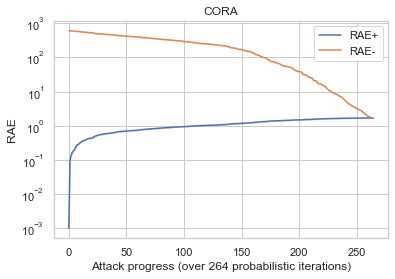

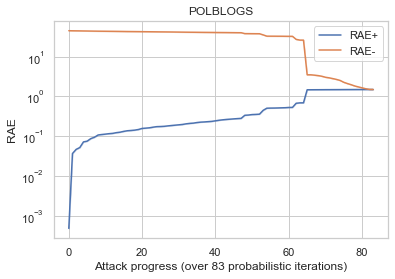

In [22]:
# Plot results
for dataset_name in dataset_names:
    current_results = results[dataset_name]
    for j, (graph1_prop, common_prop) in enumerate(product(graph1_props, common_props)):

        current_results = current_results[(current_results['graph1_prop'] == graph1_prop) & (current_results['common_prop'] == common_prop) & (current_results['attack_type'] == 'probabilistic')].copy()
        number_probabilistics = current_results["iter_num"].max()

        current_results.loc[:, "progress"] = (current_results.loc[:, "iter_num"] / current_results.loc[:,"iter_num"].max()).astype(float)

        rae_plus = ((current_results["FP"] + current_results["FN"]) /  graph_statistics[dataset_name]["edges"]).astype(float)
        rae_minus = (( (current_results["FP"] + current_results["FN"] ) + current_results["unknown"] ) / graph_statistics[dataset_name]["edges"]).astype(float)
        
        current_results["rae_plus"] = rae_plus
        current_results["rae_minus"] = rae_minus


        sns.lineplot(x='iter_num', y='rae_plus', data=current_results, label=f'RAE+')
        sns.lineplot(x=current_results["iter_num"], y=current_results['rae_minus'], label=f'RAE-')
        plt.xlabel(f'Attack progress (over {number_probabilistics} probabilistic iterations)')
        plt.ylabel('RAE')
        plt.yscale("log") 
        plt.title(f'{dataset_name.upper()}')
        plt.legend()
        plt.show()


## Proportion of identified edges

## Accuracy (number of slots correctly filled in the adjacency matrix)

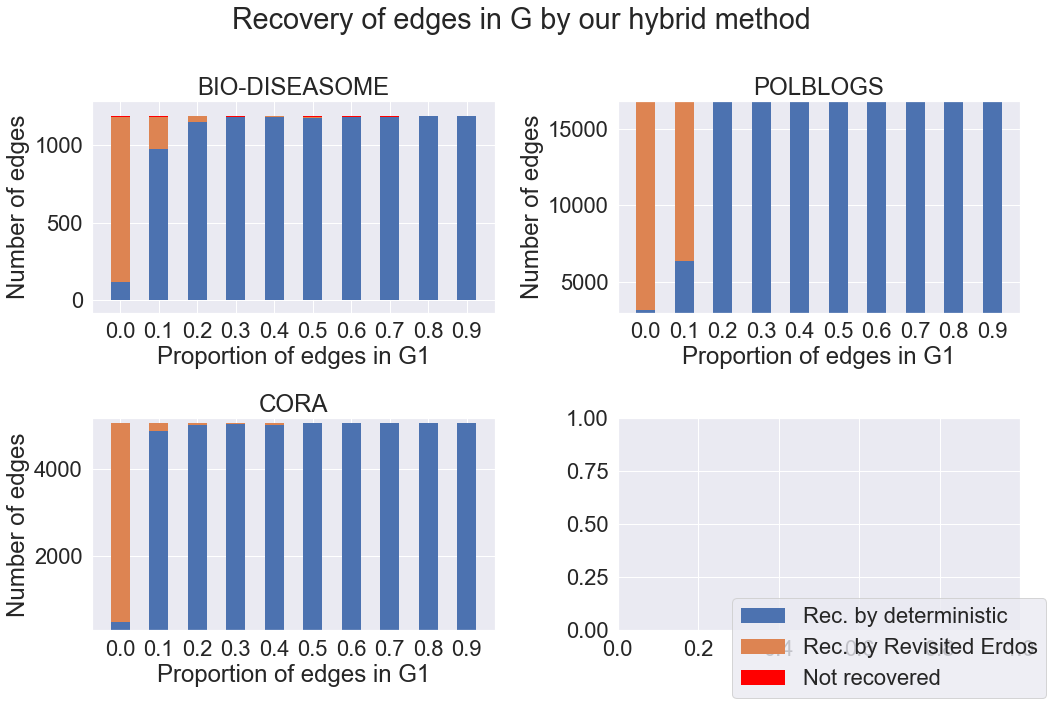

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")
sns.set(font_scale=2)  # crazy big

dataset_names = ['bio-diseasome', 'polblogs', 'cora']
fig, axes = plt.subplots(2 , 2, figsize=(15, 10))
graph1_props = [0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i, dataset_name in enumerate(dataset_names):
    data = pd.read_csv(f"logs_erdos/{dataset_name}.csv", header=None)
    data.columns = ['run', 'attack_type','graph1_prop', 'common_prop', 'iter_num', 'absent', 'present', 'unknown', 'TP', 'FP', 'TN', 'FN', 'time']

    results =  []

    for prop in graph1_props:
        last_deterministic = data[(data['graph1_prop'] == prop) & (data['common_prop'] == 0) & (data['attack_type'] == 'deterministic')].tail(1)
        erdos = data[(data['graph1_prop'] == prop) & (data['common_prop'] == 0) & (data['attack_type'] == 'erdos')]

        if len(erdos) == 0:
            results.append((last_deterministic["TP"].values[0], 0, 0))
        else:
            erdos = erdos.tail(1)
            deterministic = last_deterministic["TP"].values[0]
            r_erdos = erdos["TP"].values[0] - last_deterministic["TP"].values[0]
            missing = graph_statistics[dataset_name]["edges"] - erdos["TP"].values[0]
            results.append((deterministic, r_erdos, missing))

    results = np.array(results)

    bar_width = 0.05
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.bar(graph1_props, results[:, 0], width=bar_width, label='Rec. by deterministic' if i == 0 else "", edgecolor='none')
    ax.bar(graph1_props, results[:, 1], width=bar_width, bottom=results[:, 0], label='Rec. by Revisited Erdos' if i == 0 else "", edgecolor='none')
    ax.bar(graph1_props, results[:, 2], width=bar_width, bottom=results[:, 0] + results[:, 1], label='Not recovered' if i == 0 else "", edgecolor='none', color='red')

    ax.set_ylim(min(results[:, 0]) - 200, graph_statistics[dataset_name]["edges"] + 100)
    ax.set_title(f'{dataset_name.upper()}')
    ax.set_xlabel('Proportion of edges in G1')
    ax.set_ylabel('Number of edges')
    ax.set_xticks(graph1_props)  # Set the x-axis ticks to match the positions
    

plt.suptitle('Recovery of edges in G by our hybrid method')
plt.tight_layout()
fig.legend(loc="lower right")
fig.subplots_adjust(top=0.85)
plt.show()





# RAE - G1 empty - Comparision with Erdos et al.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset_names = ['bio-diseasome', 'polblogs', 'cora', 'flickr']

fig, axes = plt.subplots(2 , 2, figsize=(15, 10))


for i, dataset_name in enumerate(dataset_names):
    data = pd.read_csv(f"logs_erdos/{dataset_name}.csv", header=None)
    data.columns = ['run', 'attack_type','graph1_prop', 'common_prop', 'iter_num', 'absent', 'present', 'unknown', 'TP', 'FP', 'TN', 'FN', 'time']

    results =  []

    last_deterministic = data[(data['graph1_prop'] == 0) & (data['common_prop'] == 0) & (data['attack_type'] == 'deterministic')].tail(1)
    erdos = data[(data['graph1_prop'] == 0) & (data['common_prop'] == 0) & (data['attack_type'] == 'erdos')]

    erdos_result = 2* (erdos_results[dataset_name][1] + erdos_results[dataset_name][3]) / graph_statistics[dataset_name]["edges"]
    if len(erdos) == 0:
        ours = (last_deterministic["FP"].values[0] + last_deterministic["FN"].values[0]) / graph_statistics[dataset_name]["edges"]
    else:
        erdos = erdos.tail(1)
        ours = 2* (erdos["FP"].values[0] + erdos["FN"].values[0])/ graph_statistics[dataset_name]["edges"]

    row = i // 2
    col = i % 2
    ax = axes[row, col]
    nodes = graph_statistics[dataset_name]["nodes"]
    ax.bar(["Erdos", "Ours"], [erdos_result, ours], width=0.2, edgecolor='black')
    ax.set_title(f'{dataset_name.upper()} ({nodes} nodes)')
    # ax.set_yticks(np.arange(0, 0.1, 0.01))
    # ax.set_ylabel('RAE')
    
fig.suptitle('Comparison of RAE for Erdos et al. and Ours')
fig.tight_layout()
plt.legend()
plt.show()





# Precision - Recall - G1 empty - Comparision with Erdos et al.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset_names = ['bio-diseasome', 'polblogs', 'cora', 'flickr']

precisions = pd.DataFrame(columns=['dataset', 'erdos', 'ours'])
recalls = pd.DataFrame(columns=['dataset', 'erdos', 'ours'])

for i, dataset_name in enumerate(dataset_names):
    data = pd.read_csv(f"logs_erdos/{dataset_name}.csv", header=None)
    data.columns = ['run', 'attack_type','graph1_prop', 'common_prop', 'iter_num', 'absent', 'present', 'unknown', 'TP', 'FP', 'TN', 'FN', 'time']

    last_deterministic = data[(data['graph1_prop'] == 0) & (data['common_prop'] == 0) & (data['attack_type'] == 'deterministic')].tail(1)
    erdos = data[(data['graph1_prop'] == 0) & (data['common_prop'] == 0) & (data['attack_type'] == 'erdos')]

    print(erdos_results[dataset_name])

    og_erdos_precision = erdos_results[dataset_name][0] / (erdos_results[dataset_name][0] + erdos_results[dataset_name][1])
    og_erdos_recall = erdos_results[dataset_name][0] / (erdos_results[dataset_name][0] + erdos_results[dataset_name][3])

    if len(erdos) == 0:
        last_row = last_deterministic.tail(1)
    else:
        last_row = erdos.tail(1)
       
    our_precision = last_row["TP"].values[0] / (last_row["TP"].values[0] + last_row["FP"].values[0])
    our_recall = last_row["TP"].values[0] / (last_row["TP"].values[0] + last_row["FN"].values[0])

    precisions = pd.concat([precisions, pd.DataFrame({'dataset': dataset_name, 'erdos': og_erdos_precision, 'ours': our_precision}, index=[0])])
    recalls = pd.concat([recalls, pd.DataFrame({'dataset': dataset_name, 'erdos': og_erdos_recall, 'ours': our_recall}, index=[0])])

print(precisions)
print(recalls)



(1182, 10, 132188, 6)
(16713, 0, 730537, 1)
(5053, 17, 3083767, 16)
24546


/var/folders/zf/mm8hyjbs5kdg2gxhblkfwn0c0000gn/T/ipykernel_48250/3021359171.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  precisions = pd.concat([precisions, pd.DataFrame({'dataset': dataset_name, 'erdos': og_erdos_precision, 'ours': our_precision}, index=[0])])
/var/folders/zf/mm8hyjbs5kdg2gxhblkfwn0c0000gn/T/ipykernel_48250/3021359171.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  recalls = pd.concat([recalls, pd.DataFrame({'dataset': dataset_name, 'erdos': og_erdos_recall, 'ours'

TypeError: 'int' object is not subscriptable